In [5]:
# %%
# Jupyter Notebook: Analysis of problems.json dataset
# This notebook performs step-by-step analysis on the dataset:
# 1. Load and normalize the data
# 2. Filter entries without images (image == None or empty string)
# 3. Analyze number of choices and plot pie/bar charts
# 4. Analyze grade distribution (grades 1–12) with separate plots for 1–6 and 7–12
# 5. Analyze subject distribution (language science, social science, natural science)
# 6. Count frequency of topic, category, and skill
# 7. Check missing values in lecture and solution fields and plot pie charts
# 8. Analyze distribution of split (train/val/test)
# 9. Compute max, min, and average word count in questions

In [6]:
# %%
# 1. Import libraries and load data
import json
import pandas as pd
import matplotlib.pyplot as plt

with open('problems.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# Convert dict to DataFrame, one row per problem entry
df = pd.DataFrame.from_dict(data, orient='index')

# Show first few rows to inspect columns
df.head()

,question,choices,answer,hint,image,task,grade,subject,topic,category,skill,lecture,solution,split
1,Which of these states is farthest north?,"[West Virginia, Louisiana, Arizona, Oklahoma]",0,,image.png,closed choice,grade2,social science,geography,Geography,Read a map: cardinal directions,"Maps have four cardinal directions, or main di...","To find the answer, look at the compass rose. ...",train
2,Identify the question that Tom and Justin's ex...,[Do ping pong balls stop rolling along the gro...,1,The passage below describes an experiment. Rea...,image.png,closed choice,grade8,natural science,science-and-engineering-practices,Designing experiments,Identify the experimental question,Experiments can be designed to answer specific...,,train
3,Identify the question that Kathleen and Bryant...,[Does Kathleen's snowboard slide down a hill i...,0,The passage below describes an experiment. Rea...,image.png,closed choice,grade7,natural science,science-and-engineering-practices,Designing experiments,Identify the experimental question,Experiments can be designed to answer specific...,,train
4,Which figure of speech is used in this text?\n...,"[chiasmus, apostrophe]",1,,None,closed choice,grade11,language science,figurative-language,Literary devices,"Classify the figure of speech: anaphora, antit...",Figures of speech are words or phrases that us...,"The text uses apostrophe, a direct address to ...",test
5,Which of the following could Gordon's test show?,[if the spacecraft was damaged when using a pa...,1,People can use the engineering-design process ...,image.png,closed choice,grade8,natural science,science-and-engineering-practices,Engineering practices,Evaluate tests of engineering-design solutions,People can use the engineering-design process ...,,test


In [7]:
# %%
# 2. Filter entries without images
# Some entries may use None or an empty string to indicate no image
df_no_image = df[df['image'].isnull() | (df['image'] == '')].copy()

# Confirm number of entries after filtering
print(f"Total entries: {len(df)}, Entries without image: {len(df_no_image)}")

Total entries: 21208, Entries without image: 10876


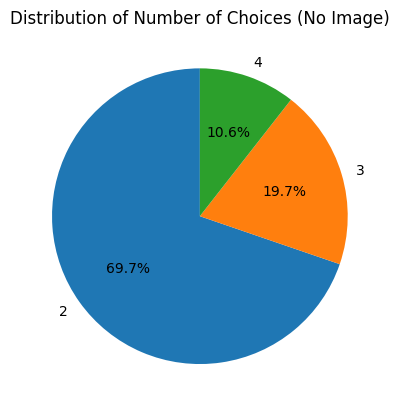

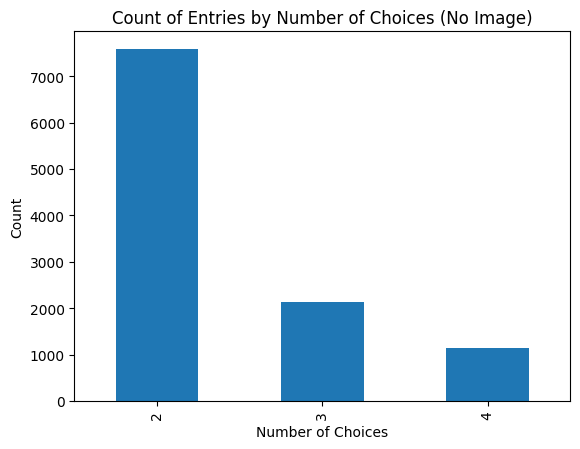

In [8]:
# %%
# 3. Analyze number of choices and plot
# Count how many choices each entry has
df_no_image['num_choices'] = df_no_image['choices'].apply(len)
counts = df_no_image['num_choices'].value_counts().sort_index()

# Pie chart
plt.figure()
counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Number of Choices (No Image)')
plt.ylabel('')
plt.show()

# Bar chart
plt.figure()
counts.plot.bar()
plt.title('Count of Entries by Number of Choices (No Image)')
plt.xlabel('Number of Choices')
plt.ylabel('Count')
plt.show()


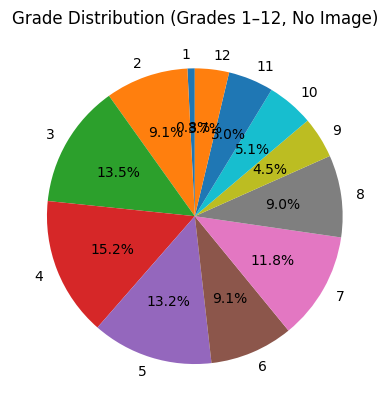

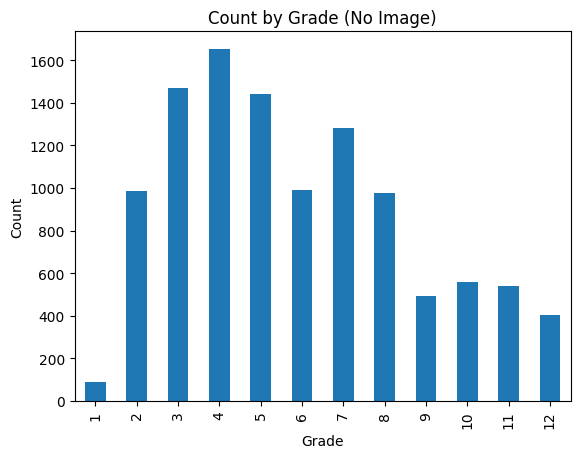

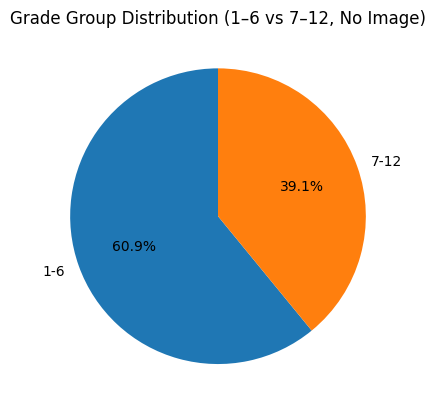

In [9]:
# %%
# 4. Grade distribution analysis
# Extract numeric grade
df_no_image['grade_num'] = df_no_image['grade'].str.extract(r'(\d+)').astype(int)
grade_counts = df_no_image['grade_num'].value_counts().sort_index()

# Pie chart for all grades
plt.figure()
grade_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Grade Distribution (Grades 1–12, No Image)')
plt.ylabel('')
plt.show()

# Bar chart for all grades
plt.figure()
grade_counts.plot.bar()
plt.title('Count by Grade (No Image)')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

# Group grades into 1–6 and 7–12
bins = [0, 6, 12]
labels = ['1-6', '7-12']
df_no_image['grade_group'] = pd.cut(df_no_image['grade_num'], bins=bins, labels=labels)
gg_counts = df_no_image['grade_group'].value_counts()

plt.figure()
gg_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Grade Group Distribution (1–6 vs 7–12, No Image)')
plt.ylabel('')
plt.show()

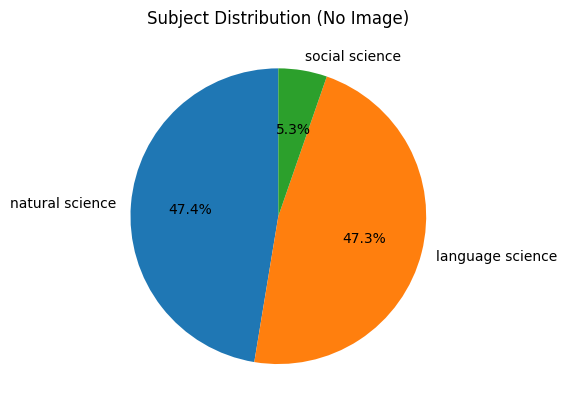

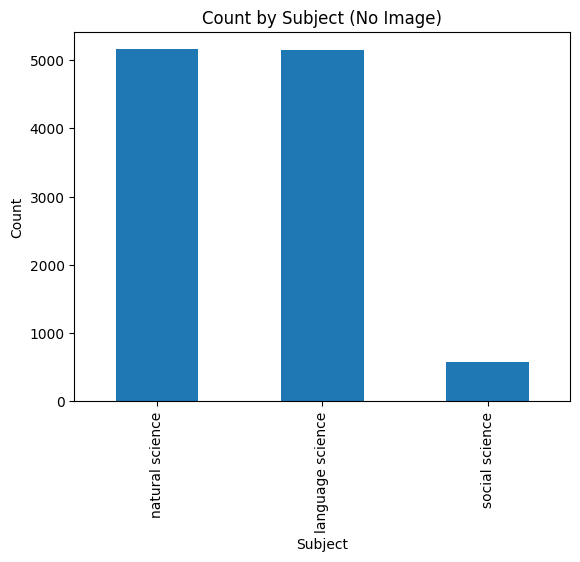

In [10]:
# %%
# 5. Subject distribution analysis
subject_counts = df_no_image['subject'].value_counts()

plt.figure()
subject_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Subject Distribution (No Image)')
plt.ylabel('')
plt.show()

plt.figure()
subject_counts.plot.bar()
plt.title('Count by Subject (No Image)')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.show()

In [15]:
# %%
# 6. Frequency of topic, category, skill
print('Topic Frequency:\n', df_no_image['topic'].value_counts())
print('\nCategory Frequency:\n', df_no_image['category'].value_counts())
print('\nSkill Frequency:\n', df_no_image['skill'].value_counts())


Topic Frequency:
 topic
biology                              1995
writing-strategies                   1511
figurative-language                  1260
physics                              1013
units-and-measurement                 870
reference-skills                      724
chemistry                             658
punctuation                           514
economics                             384
grammar                               379
earth-science                         325
science-and-engineering-practices     289
verbs                                 251
capitalization                        198
vocabulary                            138
civics                                118
phonological-awareness                 97
us-history                             43
reading-comprehension                  38
word-study                             20
pronouns                               13
geography                              12
world-history                          12
culture   

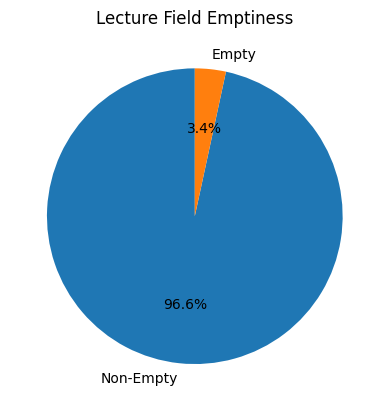

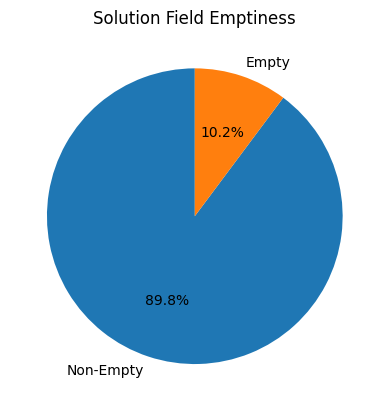

In [12]:
# %%
# 7. Lecture and Solution field emptiness
lecture_empty = df_no_image['lecture'].isnull() | (df_no_image['lecture'].str.strip() == '')
solution_empty = df_no_image['solution'].isnull() | (df_no_image['solution'].str.strip() == '')

# Pie chart for lecture
plt.figure()
lecture_empty.value_counts().plot.pie(labels=['Non-Empty', 'Empty'], autopct='%1.1f%%', startangle=90)
plt.title('Lecture Field Emptiness')
plt.ylabel('')
plt.show()

# Pie chart for solution
plt.figure()
solution_empty.value_counts().plot.pie(labels=['Non-Empty', 'Empty'], autopct='%1.1f%%', startangle=90)
plt.title('Solution Field Emptiness')
plt.ylabel('')
plt.show()

Split Distribution:
 split
train    6508
test     2224
val      2144
Name: count, dtype: int64


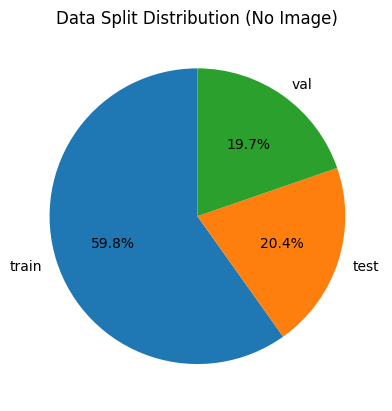

In [13]:
# %%
# 8. Split distribution and plot
split_counts = df_no_image['split'].value_counts()
print('Split Distribution:\n', split_counts)

plt.figure()
split_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Data Split Distribution (No Image)')
plt.ylabel('')
plt.show()

In [14]:
# %%
# 9. Question word count statistics
# Count number of words in each question
df_no_image['word_count'] = df_no_image['question'].apply(lambda q: len(str(q).split()))

max_wc = df_no_image['word_count'].max()
min_wc = df_no_image['word_count'].min()
avg_wc = df_no_image['word_count'].mean()
print(f"Max question word count: {max_wc}")
print(f"Min question word count: {min_wc}")
print(f"Average question word count: {avg_wc:.2f}")


Max question word count: 141
Min question word count: 3
Average question word count: 14.59


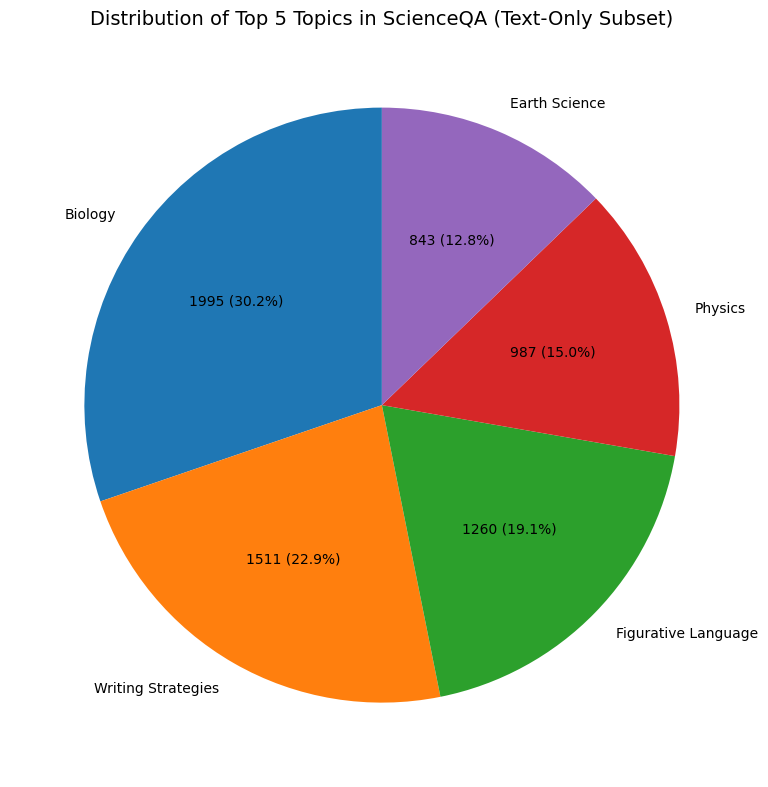

In [17]:
import matplotlib.pyplot as plt

# 数据
topics = ['Biology', 'Writing Strategies', 'Figurative Language', 'Physics', 'Earth Science']
counts = [1995, 1511, 1260, 987, 843]
total = sum(counts)

# 标签格式函数：显示 数值 + 百分比
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{val} ({pct:.1f}%)'
    return my_autopct

# 绘制饼图
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    counts,
    labels=topics,
    autopct=make_autopct(counts),
    startangle=90,
    textprops=dict(color="black", fontsize=10)
)

# 添加标题
plt.title("Distribution of Top 5 Topics in ScienceQA (Text-Only Subset)", fontsize=14)
plt.tight_layout()
plt.show()



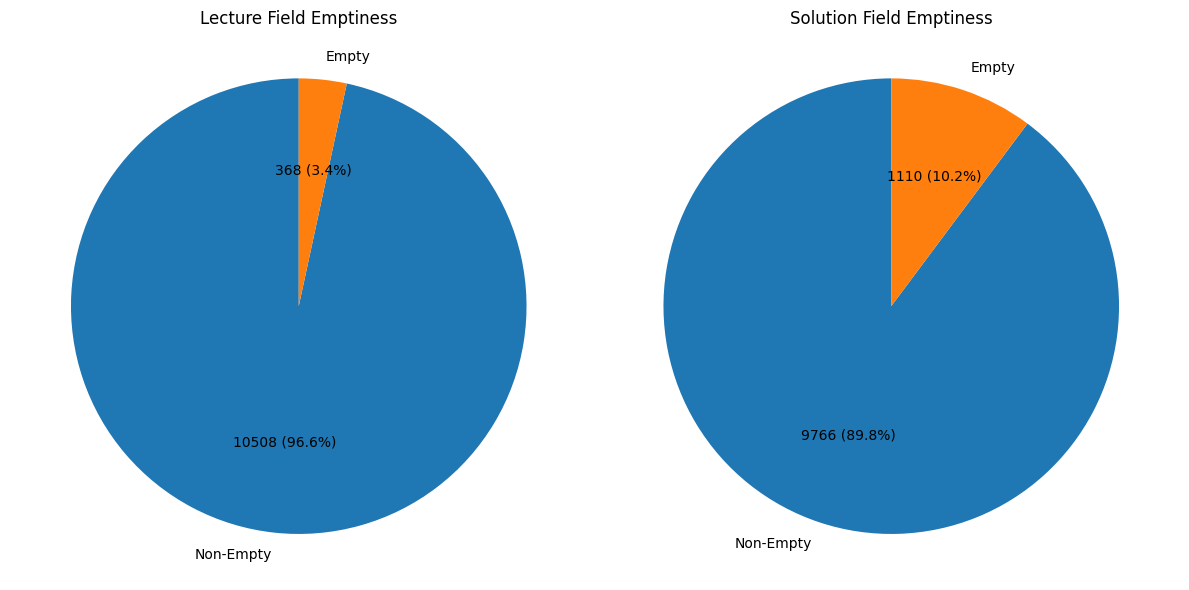

In [18]:
import matplotlib.pyplot as plt

# 计算 lecture 和 solution 是否为空
lecture_empty = df_no_image['lecture'].isnull() | (df_no_image['lecture'].str.strip() == '')
solution_empty = df_no_image['solution'].isnull() | (df_no_image['solution'].str.strip() == '')

# 统计值
lecture_counts = lecture_empty.value_counts(sort=False)  # [False, True]
solution_counts = solution_empty.value_counts(sort=False)

# 标签设定
labels = ['Non-Empty', 'Empty']

# 自定义标签函数：显示数量和百分比
def make_autopct(values):
    def autopct(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f'{count} ({pct:.1f}%)'
    return autopct

# 绘图
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 横向布局

# Lecture 饼图
axes[0].pie(
    lecture_counts,
    labels=labels,
    autopct=make_autopct(lecture_counts),
    startangle=90,
    textprops={'fontsize': 10}
)
axes[0].set_title('Lecture Field Emptiness')
axes[0].axis('equal')  # 保证是圆形

# Solution 饼图
axes[1].pie(
    solution_counts,
    labels=labels,
    autopct=make_autopct(solution_counts),
    startangle=90,
    textprops={'fontsize': 10}
)
axes[1].set_title('Solution Field Emptiness')
axes[1].axis('equal')

plt.tight_layout()
plt.show()


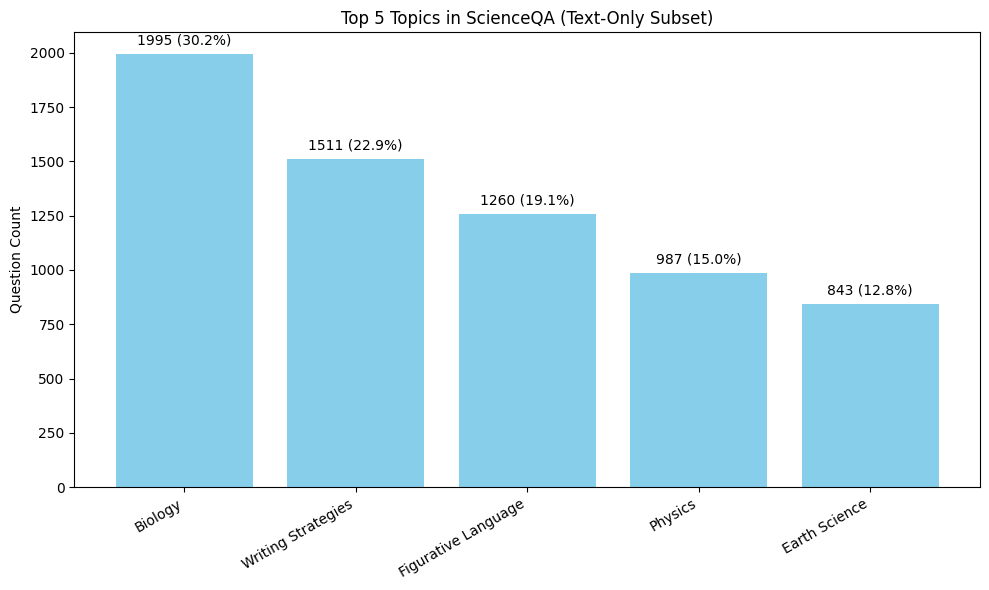

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
topics = ['Biology', 'Writing Strategies', 'Figurative Language', 'Physics', 'Earth Science']
counts = [1995, 1511, 1260, 987, 843]
total = sum(counts)

# 百分比
percentages = [count / total * 100 for count in counts]

# 位置
x = np.arange(len(topics))

# 绘图
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(x, counts, color='skyblue')

# 设置标签和标题
ax.set_xticks(x)
ax.set_xticklabels(topics, rotation=30, ha='right')
ax.set_ylabel('Question Count')
ax.set_title('Top 5 Topics in ScienceQA (Text-Only Subset)')

# 在柱状图上标注百分比和数量
for bar, count, pct in zip(bars, counts, percentages):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 30, f'{count} ({pct:.1f}%)', 
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
